## Exploratory Data Analysis

### Preliminary

In [2]:
import requests, json # for getting data
from urllib.parse import urlencode

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

let's import our cleaned data

In [3]:
fname = 'data/centadata_clean.csv'
df = pd.read_csv( fname, index_col = 0 )

df.head()

,txdate,price,saleablearea,xaxis,yaxis,buildingaddress,dateofcompletion,numberofunits,numberoffloors,flatsperfloor,schoolnet,region,price_per_sqf,flat_type,floor_number,building_age,deal_age,deal_year,schoolnet_en
0,2017-02-16,2880000,392.0,NO. 205A,2/F,205A TUNG CHOI STREET,1963-08-01,8,8,1,九龍區32號校網,Mongkok/Yaumatei,7346.938776,NaN,2,55.301848,641,2017,Kowloon district No. 32 school network
1,2018-01-11,3000000,392.0,NO. 205A,3/F,205A TUNG CHOI STREET,1963-08-01,8,8,1,九龍區32號校網,Mongkok/Yaumatei,7653.061224,NaN,3,55.301848,312,2018,Kowloon district No. 32 school network
2,2017-06-26,51000000,1912.0,NO. 4B,5/F,4A-4B WONG NAI CHUNG GAP ROAD,1965-09-01,8,8,1,香港區12號校網,Happy Valley/Mid Level East,26673.640167,NaN,5,53.215606,511,2017,Hong Kong District No. 12 school network
3,2018-03-21,4150000,294.0,FLAT B,16/F,98 TSEUK LUK STREET,1999-01-01,30,15,2,九龍區43號校網,Diamond Hill/Wong Tai Sin,14115.646259,NaN,16,19.882272,243,2018,Kowloon district No. 43 school network
4,2017-11-28,5250000,530.0,FLAT B,8/F,54-58 SOUTH WALL ROAD,1969-10-01,32,9,4,九龍區41號校網,Diamond Hill/Wong Tai Sin,9905.660377,NaN,8,49.133470,356,2017,Kowloon district No. 41 school network


### Subsetting the Data
for the easy of visualization, let's just focus on 2018 transaction records for now

In [55]:
df_sub = df[ df.deal_year == 2018]

print( f'There are {len(df_sub.price_per_sqf)} transaction in 2018 \n Our entire dataset has {len(df)} transaction')

There are 38401 transaction in 2018 
 Our entire dataset has 87759 transaction


In [56]:
df_sub.describe()

,price,saleablearea,numberofunits,numberoffloors,flatsperfloor,price_per_sqf,floor_number,is_dettached,building_age,deal_age,deal_year
count,3.840100e+04,38401.000000,38401.000000,38401.000000,38401.000000,38401.000000,38401.000000,38401.000000,38401.000000,38401.000000,38401.0
mean,9.313742e+06,575.156845,188.510429,24.670295,7.270305,15074.391380,14.845733,0.013151,28.278388,184.256217,2018.0
std,1.204349e+07,349.218496,143.177487,12.606226,4.282961,5765.134363,12.183596,0.113921,16.053883,79.649117,0.0
min,5.500000e+05,97.000000,1.000000,1.000000,1.000000,1236.954001,-2.000000,0.000000,-1.043121,15.000000,2018.0
25%,4.900000e+06,379.000000,78.000000,15.000000,4.000000,11428.571429,5.000000,0.000000,16.290212,122.000000,2018.0
50%,6.400000e+06,492.000000,176.000000,24.000000,8.000000,14113.475177,12.000000,0.000000,28.457221,185.000000,2018.0
75%,9.480000e+06,650.000000,268.000000,34.000000,8.000000,17451.523546,21.000000,0.000000,38.707734,255.000000,2018.0
max,7.300000e+08,5529.000000,1037.000000,65.000000,39.000000,139819.957862,85.000000,1.000000,70.622861,317.000000,2018.0


and for categorical data:

In [59]:
print( f'There are {len( df_sub.region.unique())} regions.')
print( f'There are {len( df_sub.schoolnet_en.unique())} school nets.')
print( f'And {len( df_sub.buildingaddress.unique())} unique building address.')
print( f'{ "{:.2%}".format(df_sub.is_dettached.mean()) } of transactions are dettached homes')

Ttl_sale = sum( df_sub.price)
dettached_sale = sum( df_sub[ df_sub.is_dettached == 1]['price'])
print( f' dettached homes account for { "{:.2%}".format( dettached_sale / Ttl_sale) } of total sales')

There are 57 regions.
There are 34 school nets.
And 7047 unique building address.
1.32% of transactions are dettached homes
 dettached homes account for 5.79% of total sales


let's see where the top 10 hottest transaction areas are

In [108]:
df_agg_addr = df.groupby(['buildingaddress']).agg({
    'price_per_sqf':{
        'deal_count':'count',
        'deal_price_avg': 'mean',
        'deal_price_stdev': 'std'
    },
    'saleablearea':{
        'size_avg': 'mean',
        'size_stdev': 'std'
    }
})
df_agg_addr.sort_values(by = ('price_per_sqf','deal_count'), ascending = False).head(10)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price_per_sqf                                  \
                          deal_count deal_price_avg deal_price_stdev   
buildingaddress                                                        
51 WING SHUN STREET              923   16076.950097      2013.205335   
28 SHEUNG SHING STREET           728   25749.707452      3922.111058   
9 MUK NING STREET                723   21892.321913      2727.245991   
7 MUK NING STREET                653   20035.910735      2065.343086   
28 SHAM MONG ROAD                650   21639.916350      2998.597031   
1 LOHAS PARK ROAD                629   11572.927329      1529.967745   
23 TONG CHUN STREET              600   15966.183931      3362.426455   
8 MUK NING STREET                554   19364.107789      2173.851139   
8 HOI FAI ROAD                   528   18349.771215      3659.574740   
11 SHAP PAT HEUNG ROAD           523   12188.758059      1580.983114   

                       saleablearea              
                           size_avg  size_stdev  
buildingaddress                                  
51 WING SHUN STREET      617.488624  302.849527  
28 SHEUNG SHING STREET   657.681319  179.449579  
9 MUK NING STREET        525.701245  230.290962  
7 MUK NING STREET        510.035222  159.648147  
28 SHAM MONG ROAD        506.003077  360.365313  
1 LOHAS PARK ROAD        755.650238  127.362234  
23 TONG CHUN STREET      596.151667  197.002679  
8 MUK NING STREET        600.687726  227.476132  
8 HOI FAI ROAD           657.382576  178.044537  
11 SHAP PAT HEUNG ROAD   461.367113  151.129575

Let's Geocode these locations

In [109]:
def geocode( in_address, giveLatLon = True):
    url = "https://www.als.ogcio.gov.hk/lookup"
    headers = { 'Accept': 'application/json'}
    params = {
        "q": in_address,
        'n': 1
    }
    data = requests.post(url, headers = headers, data = params)
    
    if data.status_code == 200:
        djson = json.loads( data.text )
        geodata = djson['SuggestedAddress'][0]['Address']['PremisesAddress']['GeospatialInformation'][0]
        if giveLatLon:
            return ( float(geodata['Latitude']), float(geodata['Longitude']))
        else:
            geodata
    else:
        return None

In [113]:
df_map = df_agg_addr.sort_values(by = ('price_per_sqf','deal_count'), ascending = False).head(10)
l_latlong = [ geocode(addr) for addr in df_map.index ]

print( l_latlong)

[(22.3592, 114.1141), (22.32, 114.1839), (22.3168, 114.1893), (22.3168, 114.1893), (22.3332, 114.1456), (22.2928, 114.2731), (22.3093, 114.2595), (22.2823, 114.2212), (22.3199, 114.1562), (22.4369, 114.0324)]


Let's Map these places

In [134]:
import folium
from folium.plugins import HeatMap

# init map
start_loc = l_latlong[0]
map_obj = folium.Map( location = start_loc, zoom_start= 11, tiles = 'OpenStreetMap' ) # for low zone: 'Mapbox Control Room'

rank = 1
for addr, latlong in zip( df_map.index, l_latlong ):
    folium.Marker( list(latlong), popup= str(rank) + ": " + addr).add_to(map_obj)
    rank += 1

# heat map
#heat_data = [list(i) for i in l_latlong]
#HeatMap(heat_data).add_to(map_obj)

# show map
map_obj

let's aggregate the date by `region` to see the difference in `price_per_sqf` and `saleablearea` to find the **most affordable** region in Hong Kong

In [106]:
df_agg = df.groupby(['region']).agg({
    'price_per_sqf':{
        'deal_count':'count',
        'deal_price_avg': 'mean',
        'deal_price_stdev': 'std'
    },
    'saleablearea':{
        'size_avg': 'mean',
        'size_stdev': 'std'
    }
})
df_agg[('saleablearea','size_rank')] = df_agg[('saleablearea','size_avg')].rank( ascending = False)
df_agg[('price_per_sqf','affordability_rank')] = df_agg[('price_per_sqf','deal_price_avg')].rank( ascending = True)

df_agg.sort_values(by = ('price_per_sqf','affordability_rank'), ascending = True).head(10)
#df_agg.sort_values(by = ('price_per_sqf','deal_count'), ascending = False).head(10)

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price_per_sqf  \
                                                      deal_count   
region                                                             
Tin Shui Wai                                                1838   
Kwun Tong                                                   1084   
Discovery Bay                                                733   
Tuen Mun                                                    4922   
Kwai Chung                                                   977   
Fairview Park/Palm Spring/The Vineyard                       257   
To Kwa Wan                                                  3727   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)              1854   
Tung Chung/Islands                                          1228   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti           465   

                                                                   \
                                                   deal_price_avg   
region                                                              
Tin Shui Wai                                          9015.761071   
Kwun Tong                                            10268.612788   
Discovery Bay                                        10567.047272   
Tuen Mun                                             10639.520421   
Kwai Chung                                           10748.031916   
Fairview Park/Palm Spring/The Vineyard               10789.138259   
To Kwa Wan                                           10998.314556   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)       11151.842041   
Tung Chung/Islands                                   11331.770051   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti   11396.588646   

                                                                     \
                                                   deal_price_stdev   
region                                                                
Tin Shui Wai                                            1726.619385   
Kwun Tong                                               2312.680366   
Discovery Bay                                           2016.113176   
Tuen Mun                                                2276.795887   
Kwai Chung                                              2472.744822   
Fairview Park/Palm Spring/The Vineyard                  1728.726789   
To Kwa Wan                                              3855.793560   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)          2839.508067   
Tung Chung/Islands                                      2659.011403   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti      1673.391964   

                                                   saleablearea              \
                                                       size_avg  size_stdev   
region                                                                        
Tin Shui Wai                                         552.390098   90.233512   
Kwun Tong                                            441.310886  147.106202   
Discovery Bay                                        769.047749  337.948992   
Tuen Mun                                             456.791548  120.299058   
Kwai Chung                                           404.210850   88.558750   
Fairview Park/Palm Spring/The Vineyard              1191.272374  346.816870   
To Kwa Wan                                           440.083982  140.526975   
Sham Tseng/Castle Peak Road (Tuen Mun Portion)       713.980583  306.975213   
Tung Chung/Islands                                   705.240228  363.121853   
Belvedere Garden/Castle Peak Road (Tsuen Wan Porti   667.131183  283.090956   

                                                              \
                                                   size_rank   
region                                                         
Tin Shui Wai                                            32.0   
Kwun Tong                                               48.0

In [ ]:
sns.heatmap( )

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


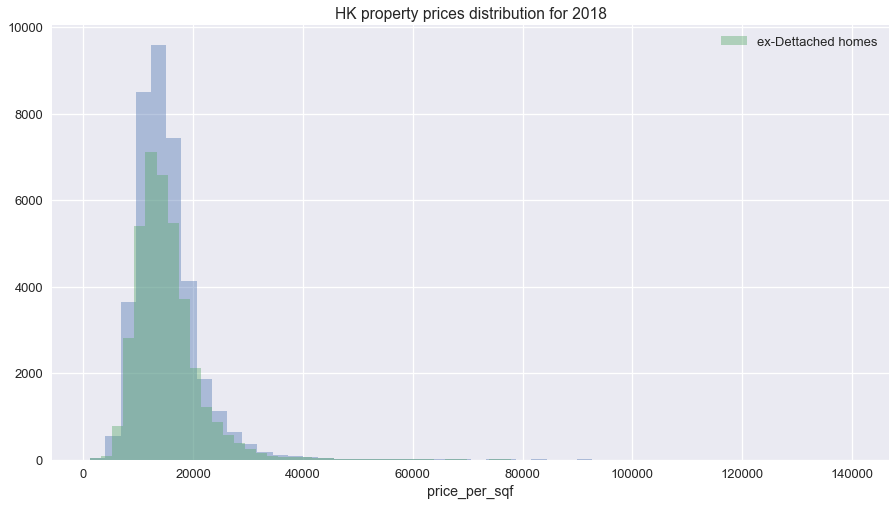

In [46]:
chart_data = df_sub

plt.figure( figsize = (15, 8))
sns.set(style = 'darkgrid', context = 'talk')
g = sns.distplot( 
            chart_data['price_per_sqf'],
            kde = False, bins = 50
        )
sns.distplot( 
            chart_data[chart_data.is_dettached == 0]['price_per_sqf'],
            kde = False, bins = 50, label = 'ex-Dettached homes'
        )

g.set_title('HK property prices distribution for 2018')
g.legend(loc='upper right')

Text(0.5,1,'HK property prices boxplot by region for 2018')

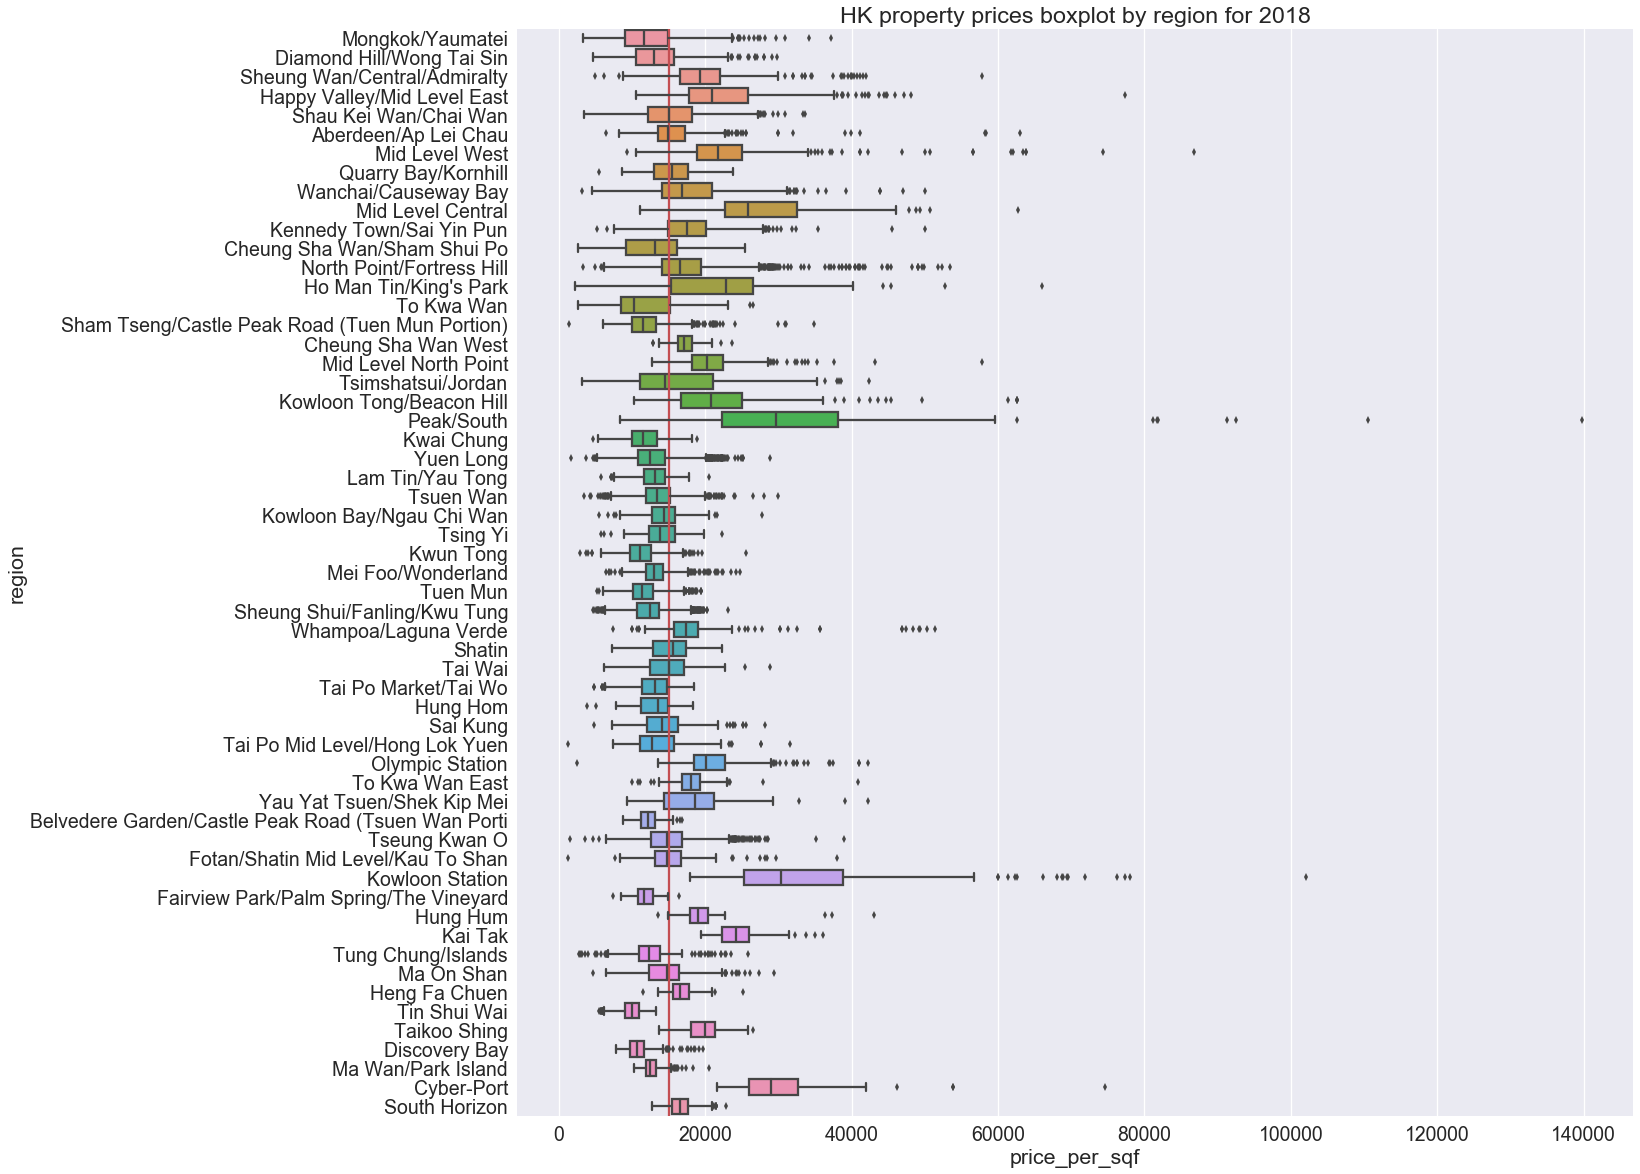

In [135]:
gdf = df_sub

plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid', context = 'talk', font_scale= 1.5)
g = sns.boxplot(x ='price_per_sqf', y = 'region', data = gdf )

mean_price = gdf.price_per_sqf.mean()
g.vlines( mean_price, g.get_ylim()[0], g.get_ylim()[1], color = 'r')
g.set_title('HK property prices boxplot by region for 2018')

# for label in g.get_xticklabels():
#     label.set_rotation(90)

In [162]:
stacked

,region,level_1,affordability_score,size_score
0,Aberdeen/Ap Lei Chau,,42.105263,47.368421
1,Belvedere Garden/Castle Peak Road (Tsuen Wan P...,,84.210526,63.157895
2,Cheung Sha Wan West,,22.807018,36.842105
3,Cheung Sha Wan/Sham Shui Po,,73.684211,5.263158
4,Cyber-Port,,5.263158,94.736842
5,Diamond Hill/Wong Tai Sin,,70.175439,22.807018
6,Discovery Bay,,96.491228,77.192982
7,Fairview Park/Palm Spring/The Vineyard,,91.228070,96.491228
8,Fotan/Shatin Mid Level/Kau To Shan,,49.122807,89.473684
9,Happy Valley/Mid Level East,,10.526316,80.701754


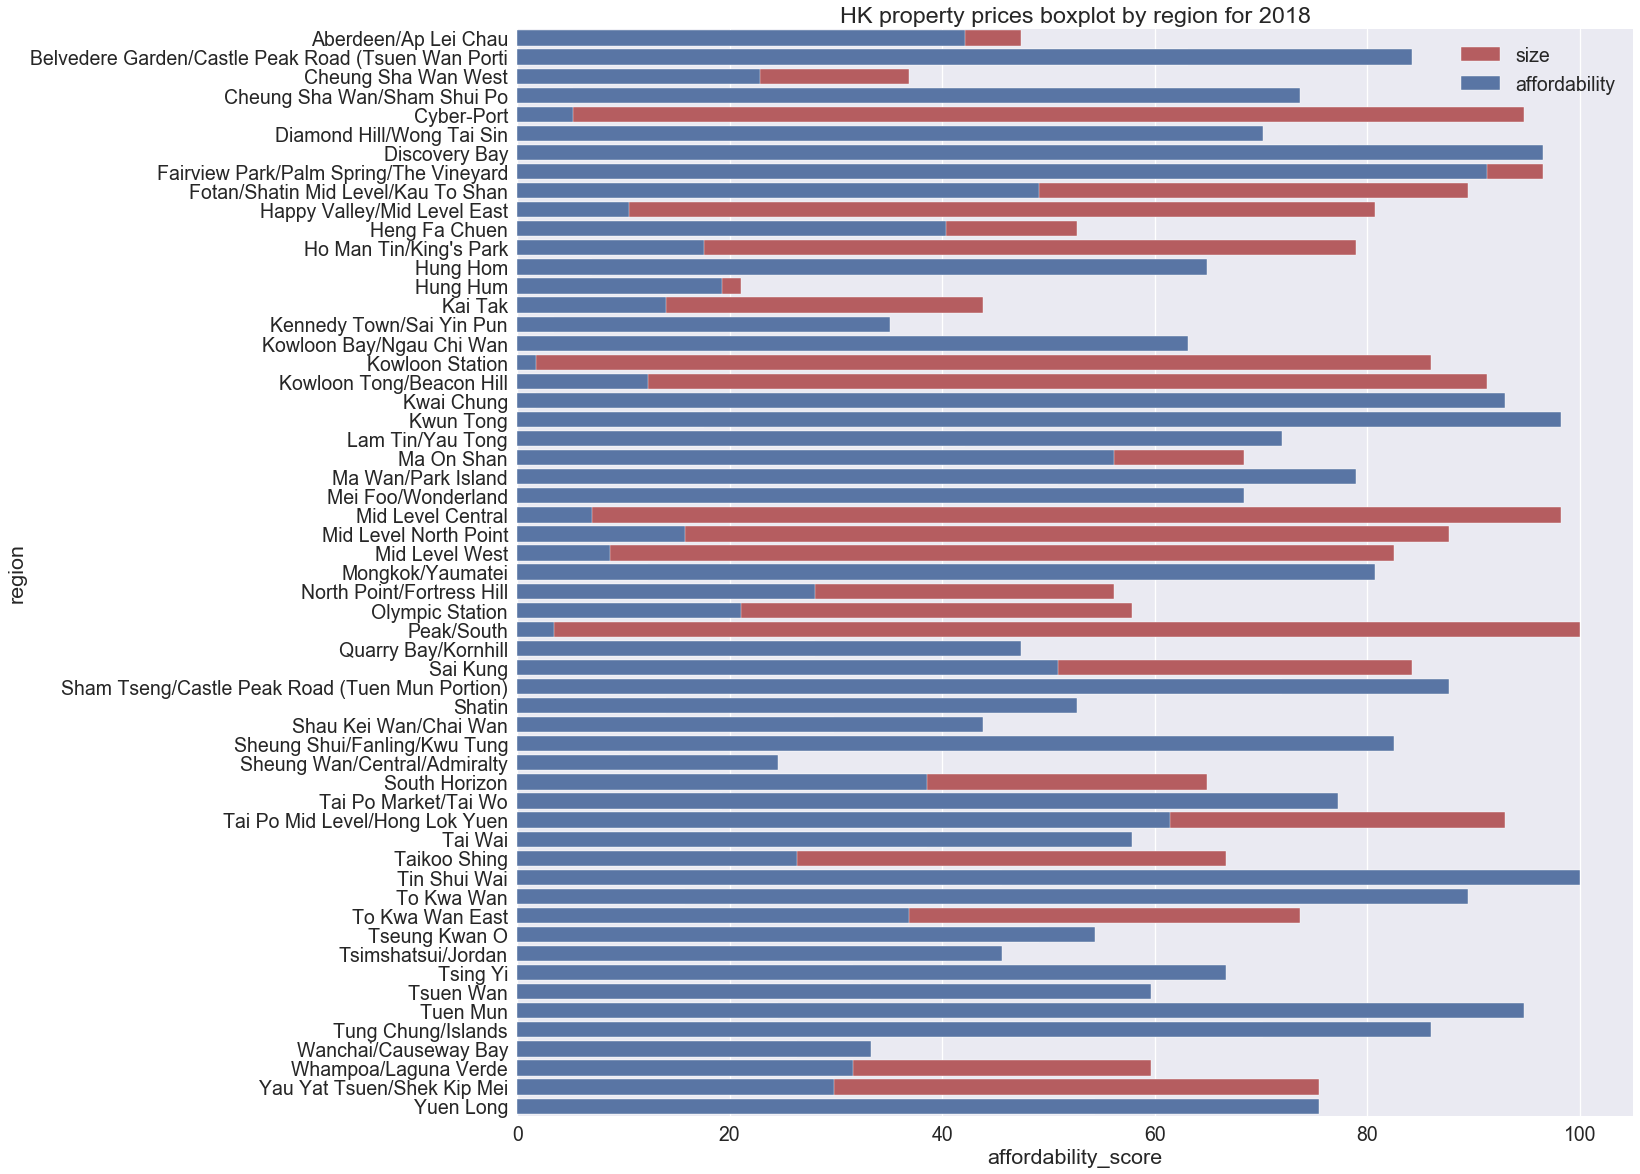

In [161]:
def rank_to_score( rank, class_size):
    return (class_size - rank + 1) / class_size * 100
gdf = df_agg.reset_index()
gdf['size_score'] = gdf[('saleablearea', 'size_rank')].apply( lambda x: rank_to_score(x, len(gdf)))
gdf['affordability_score'] = gdf[('price_per_sqf', 'affordability_rank')].apply( lambda x: rank_to_score(x, len(gdf)))

stacked = gdf.set_index('region')
stacked = stacked[['size_score', 'affordability_score']].stack().reset_index().rename(columns = {0:'value'})

plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid', context = 'talk', font_scale= 1.5)
# g = sns.barplot(x = 'size_score', y = 'region', data = gdf , 
#                 color = 'r',
#                 edgecolor = 'white',
#                 label = 'size')
# sns.barplot( x = 'affordability_score', y = 'region', data = gdf, 
#                 color = 'b',
#                 edgecolor = 'white', 
#                 label = 'affordability')

#gdf.set_index('region')[['size_score', 'affordability_score']].plot.bar(stacked = False)

sns.barplot( x = stacked.region, y = stacked.value)

g.set_title('HK property prices boxplot by region for 2018')
g.legend()

Text(0.5,1,'HK property size boxplot by region for 2018')

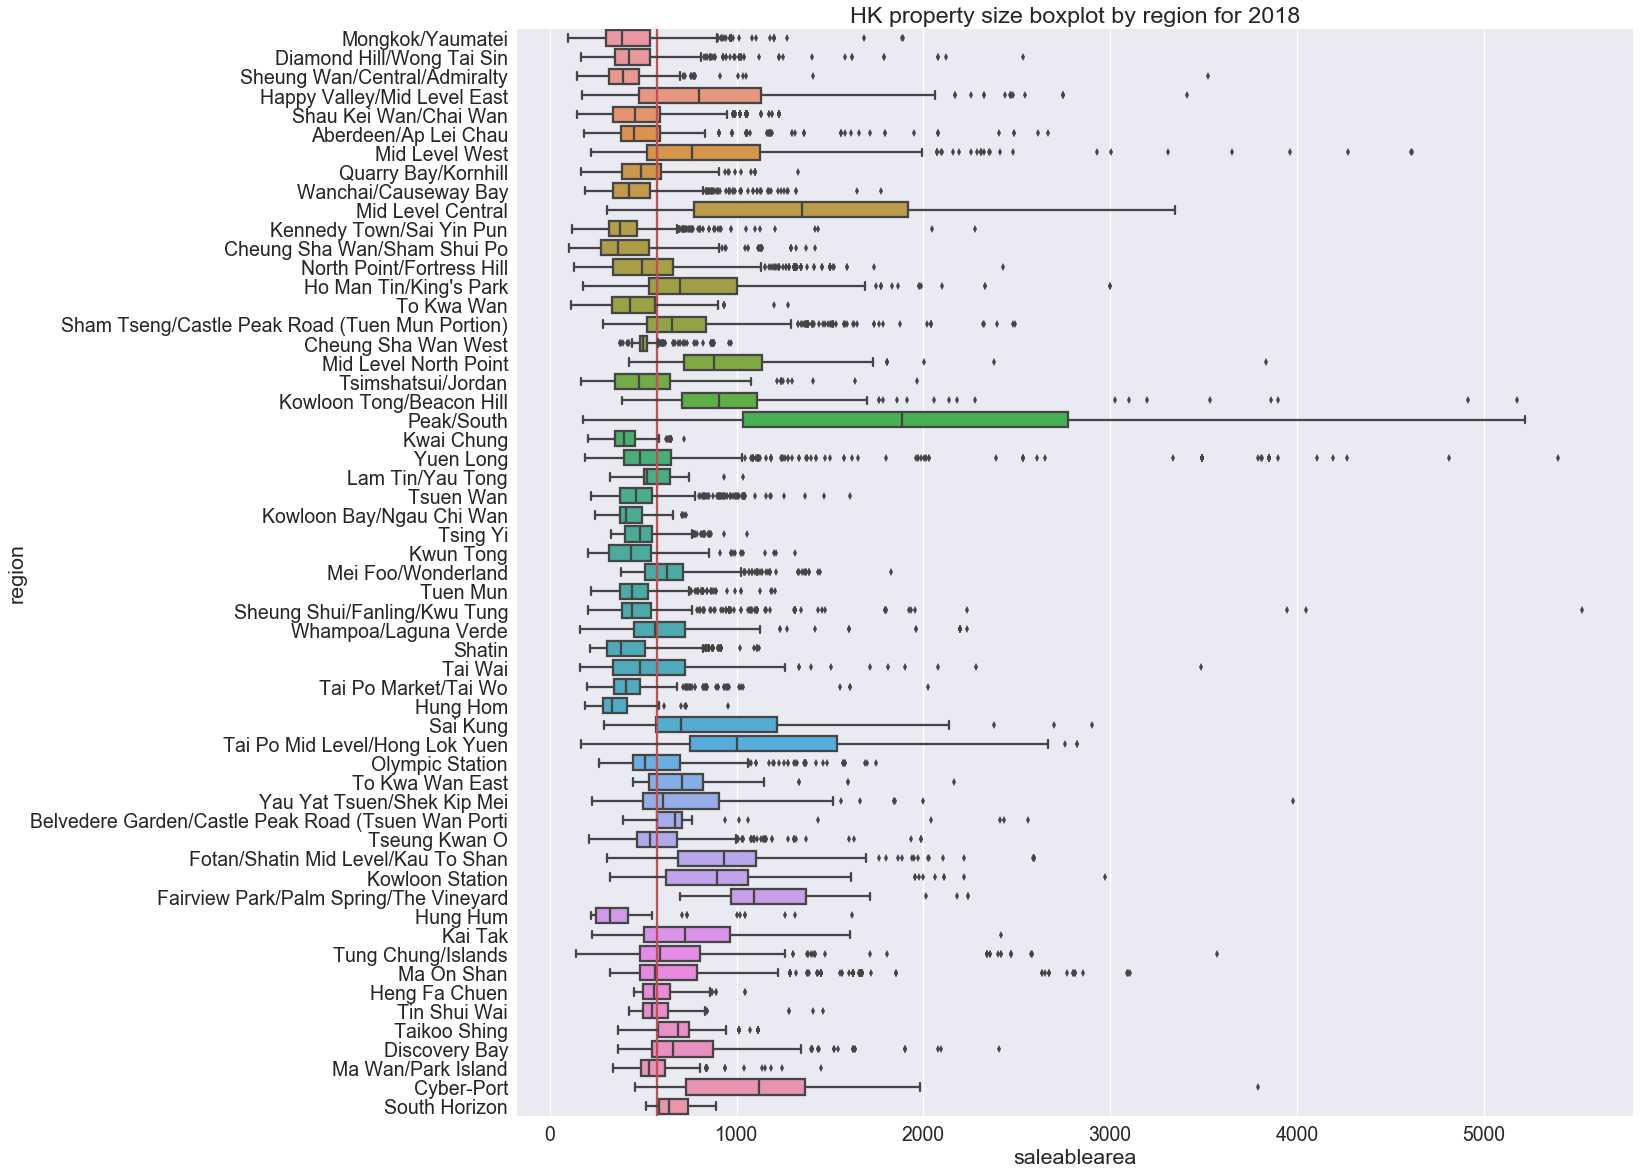

In [61]:
gdf = df_sub

plt.figure(figsize = (20,20))
sns.set(style = 'darkgrid', context = 'talk', font_scale = 1.5)
g = sns.boxplot(x ='saleablearea', y = 'region', data = gdf , orient = 'h')

mean_price = gdf['saleablearea'].mean()
g.vlines( mean_price, g.get_ylim()[0], g.get_ylim()[1], color = 'r')
g.set_title('HK property size boxplot by region for 2018')

# for label in g.get_xticklabels():
#     label.set_rotation(90)

### Let's see the relationships between our features

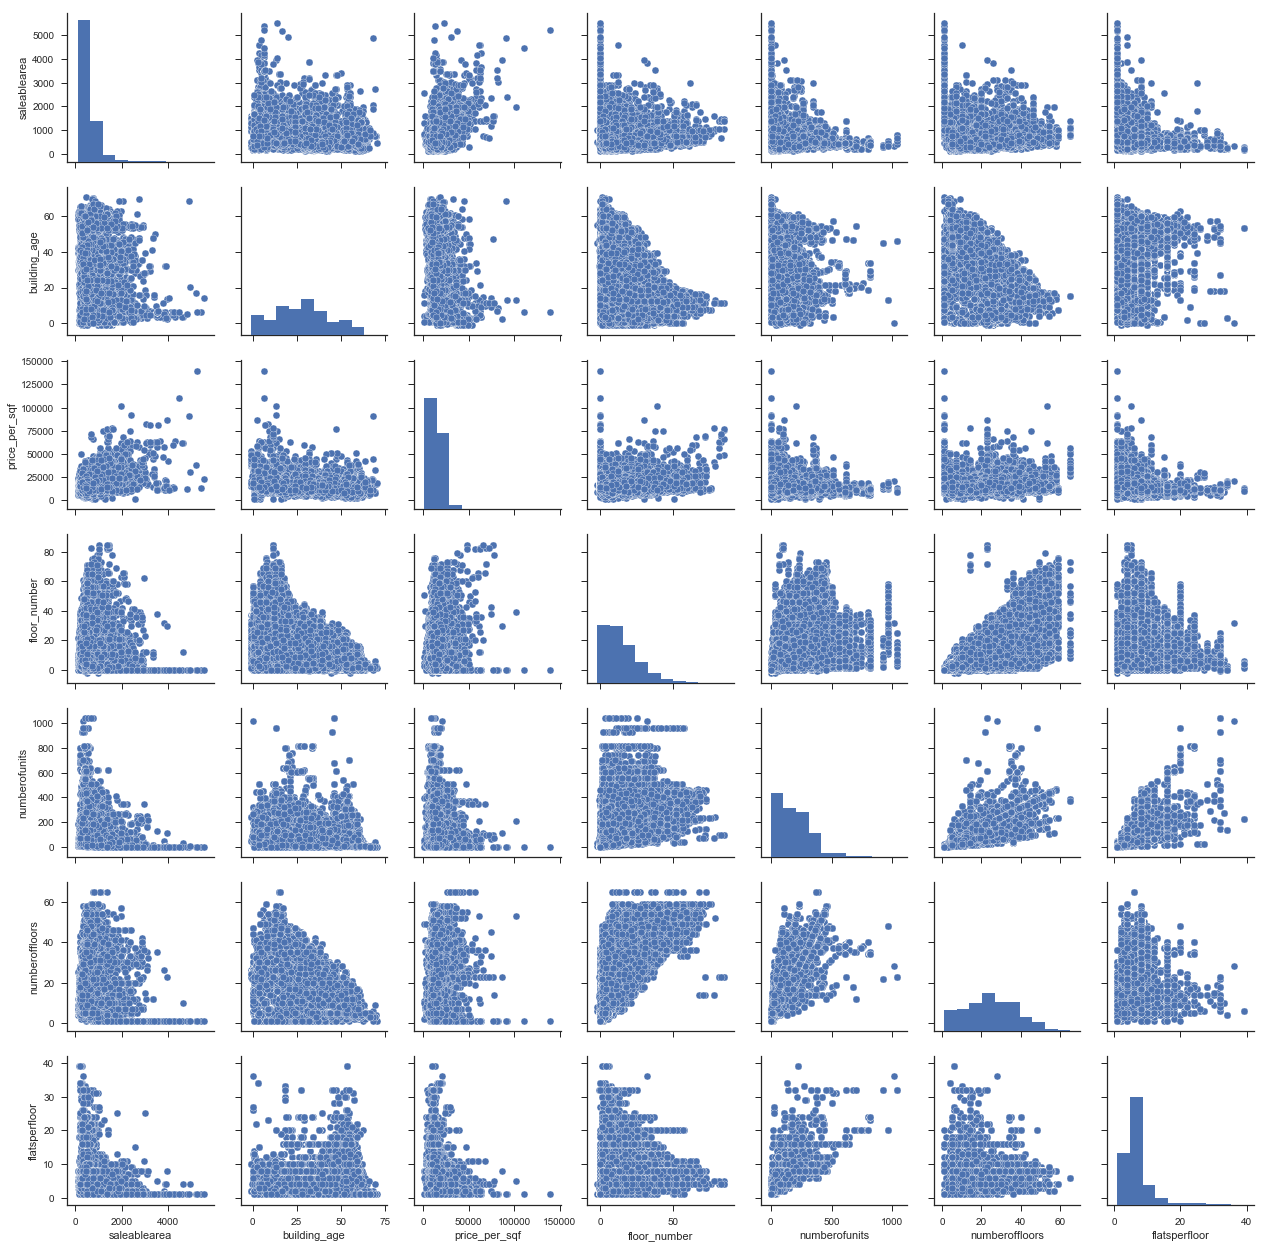

In [63]:
l_features = ['saleablearea', 'building_age', 'price_per_sqf', 'floor_number',
              'numberofunits', 'numberoffloors', 'flatsperfloor']

sns.set(style="ticks", color_codes=True)
df_chart = df_sub[l_features]
g = sns.pairplot( df_chart )

### How do the various features look vs our target: `price_per_sqf`

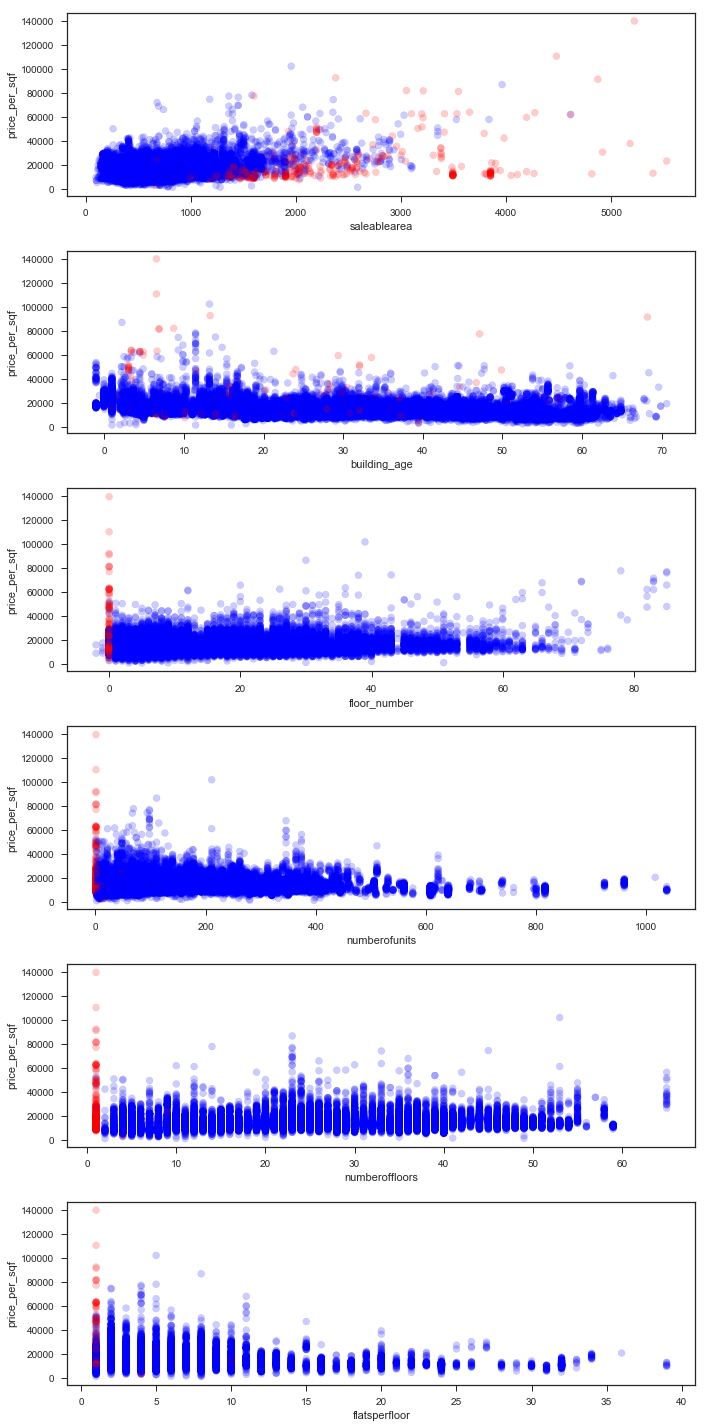

In [107]:
color_dict = { 0: 'blue',  1: 'red'}
l_scatter = ['saleablearea', 'building_age', 'floor_number', 
              'numberofunits', 'numberoffloors', 'flatsperfloor']

fig, axe = plt.subplots( len(l_scatter), 1, figsize = (10, 20))
for i , col in enumerate( l_scatter):
    axe[i]. scatter (
        x = df_sub[ col ],
        y = df_sub['price_per_sqf'],
        c = df_sub['is_dettached'].apply( lambda x: color_dict[x]),
        alpha = 0.2
    )
    axe[i].set_ylabel('price_per_sqf')
    axe[i].set_xlabel( col )
plt.tight_layout()

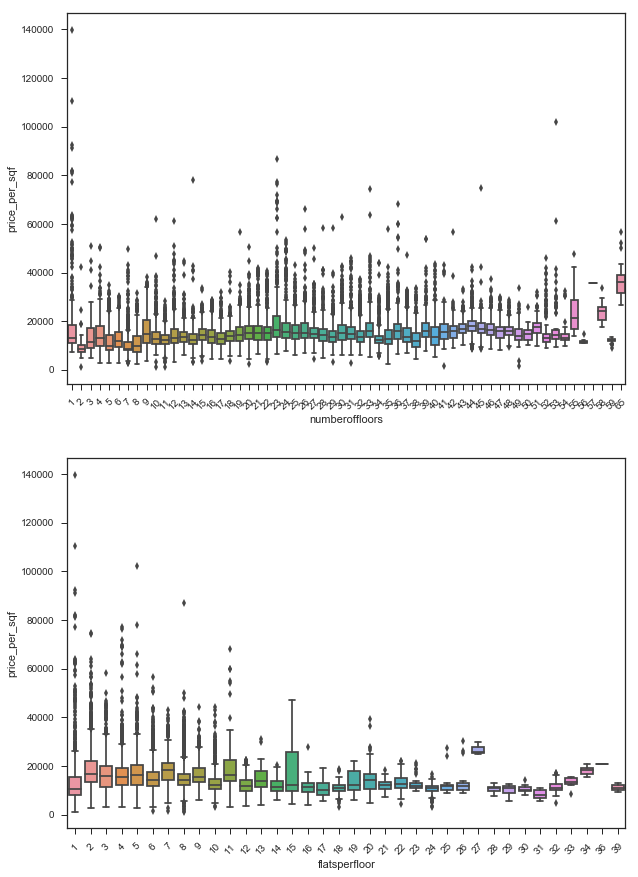

In [65]:
color_dict = { 0: 'blue',  1: 'red'}
l_box = ['numberoffloors', 'flatsperfloor']

fig, axe = plt.subplots( len(l_box), 1, figsize = (10, 15))
for i , col in enumerate( l_box):
    g = sns.boxplot(
        x = col ,
        y = 'price_per_sqf',
        data = df_sub,
        ax = axe[i]
    )

    for label in g.get_xticklabels():
        label.set_rotation(45)

### Are smaller flats more expensive?

Text(0.5,1,'price vs size')

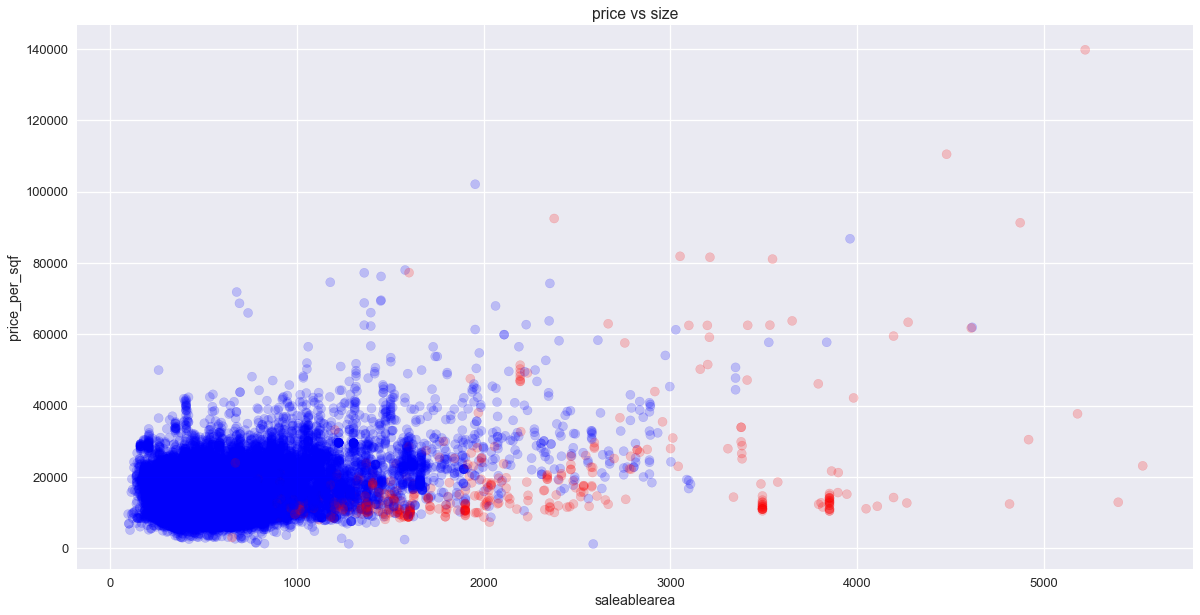

In [33]:
color_dict = { 0: 'blue',  1: 'red'}

plt.figure(figsize = (20,10))
plt.scatter (
    x = gdf['saleablearea'],
    y = gdf['price_per_sqf'],
    c = gdf['is_dettached'].apply( lambda x: color_dict[x]),
    alpha = 0.2
)
plt.ylabel('price_per_sqf')
plt.xlabel('saleablearea')
plt.title( 'price vs size')

### Are flats bigger in older building?

Text(0.5,1,'age vs size')

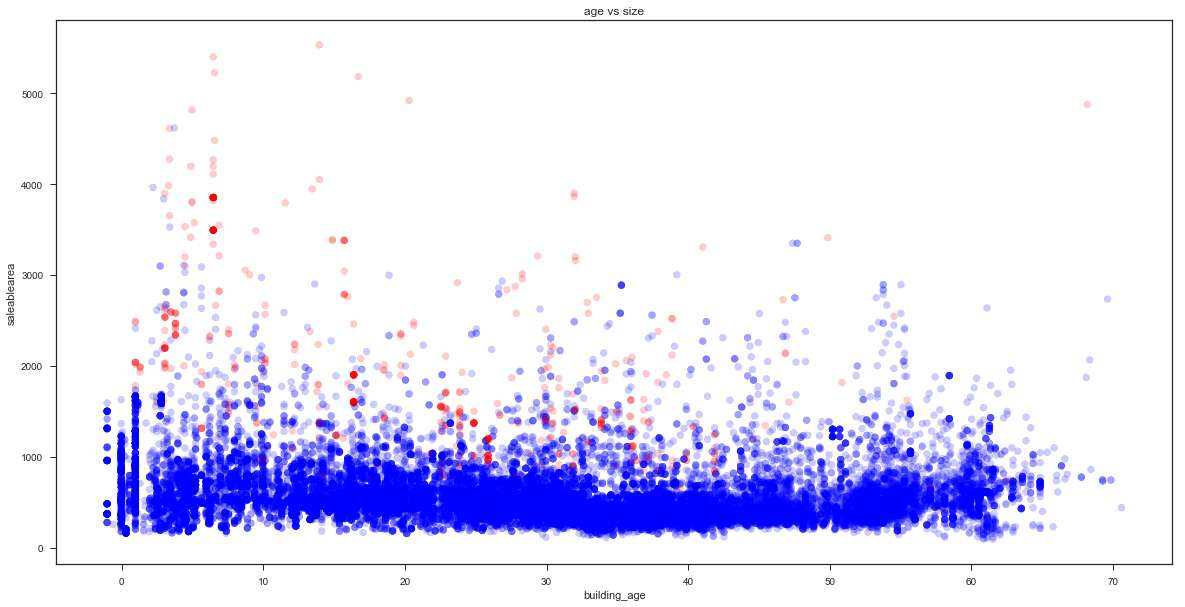

In [72]:
color_dict = { 0: 'blue',  1: 'red'}

plt.figure(figsize = (20,10))
plt.scatter (
    x = gdf['building_age'],
    y = gdf['saleablearea'],
    c = gdf['is_dettached'].apply( lambda x: color_dict[x]),
    alpha = 0.2
)
plt.ylabel('saleablearea')
plt.xlabel('building_age')
plt.title( 'age vs size')

## Findings
* location matters!
* `is_dettached` introduce a lot of noise
* Best place to buy in 2018 in terms of average size of flats and affordability are:
    * DB
    * Fairview Park
    * Castle Peak Road
    * Tung Chung
* The hottest regions in terms of # of transactions are:
    * TKO
    * Tuen Man
    * Yuen Long